In [70]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/diabetes.csv", index_col=None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Check NaN

In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Count label (graph)

Text(0.5, 1.0, 'Outcome')

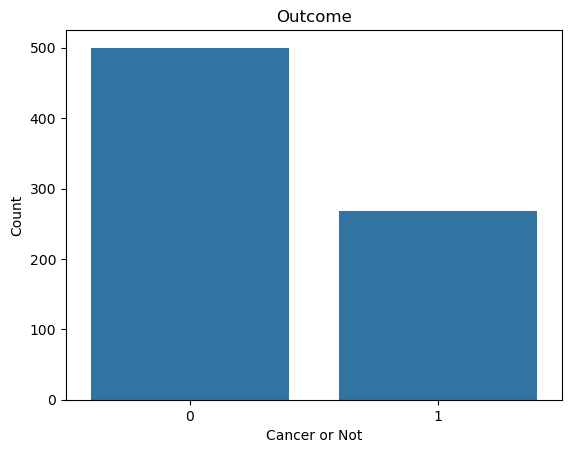

In [3]:
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

### Count label (number)

In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Check Histograms by Column

/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_58123/3592292989.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'], kde = True, hist = False, ax=ax1)
/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_58123/3592292989.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

<Axes: xlabel='Glucose', ylabel='Density'>

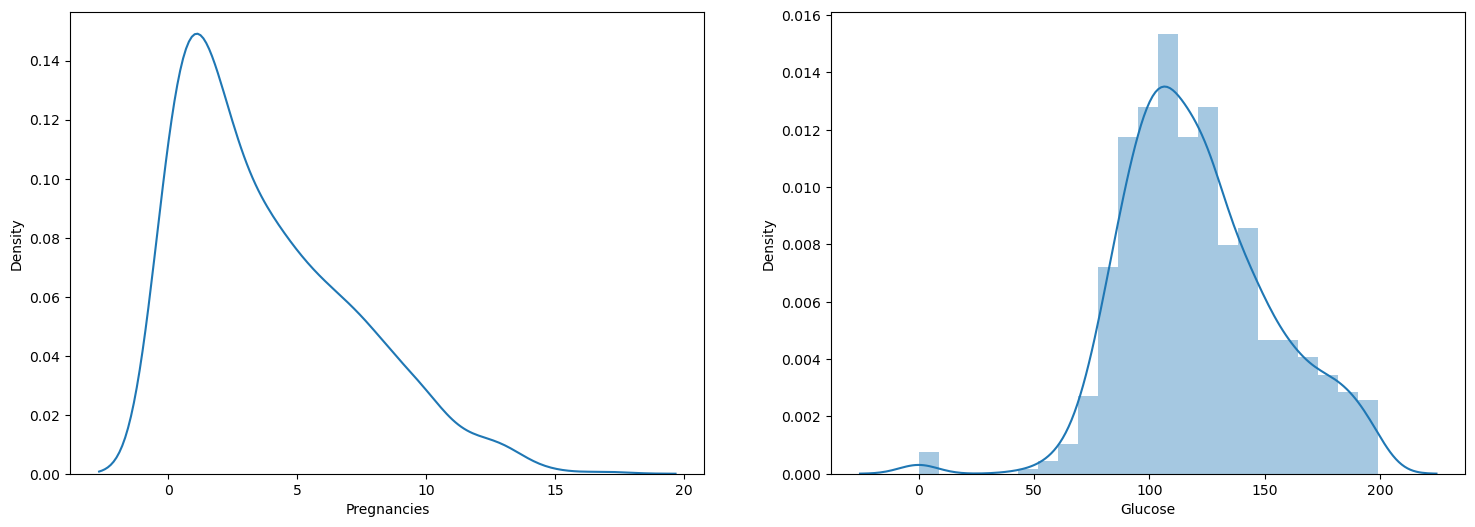

In [5]:
# 여기서는 Pregnancies와 Glucose 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Pregnancies'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Glucose'], ax=ax2)

### Check the scatterplot

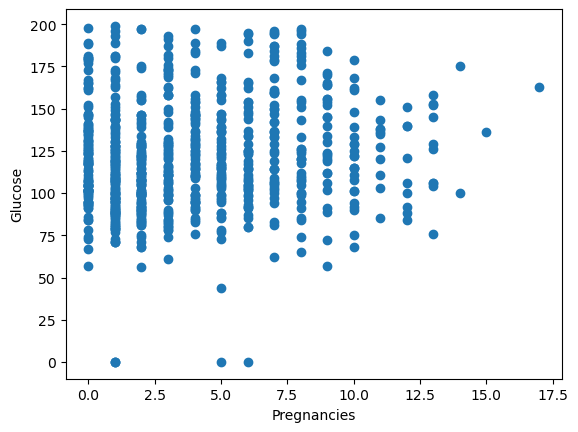

In [6]:
plt.scatter(df['Pregnancies'], df['Glucose'])
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')

plt.show()

### Examine each correlation

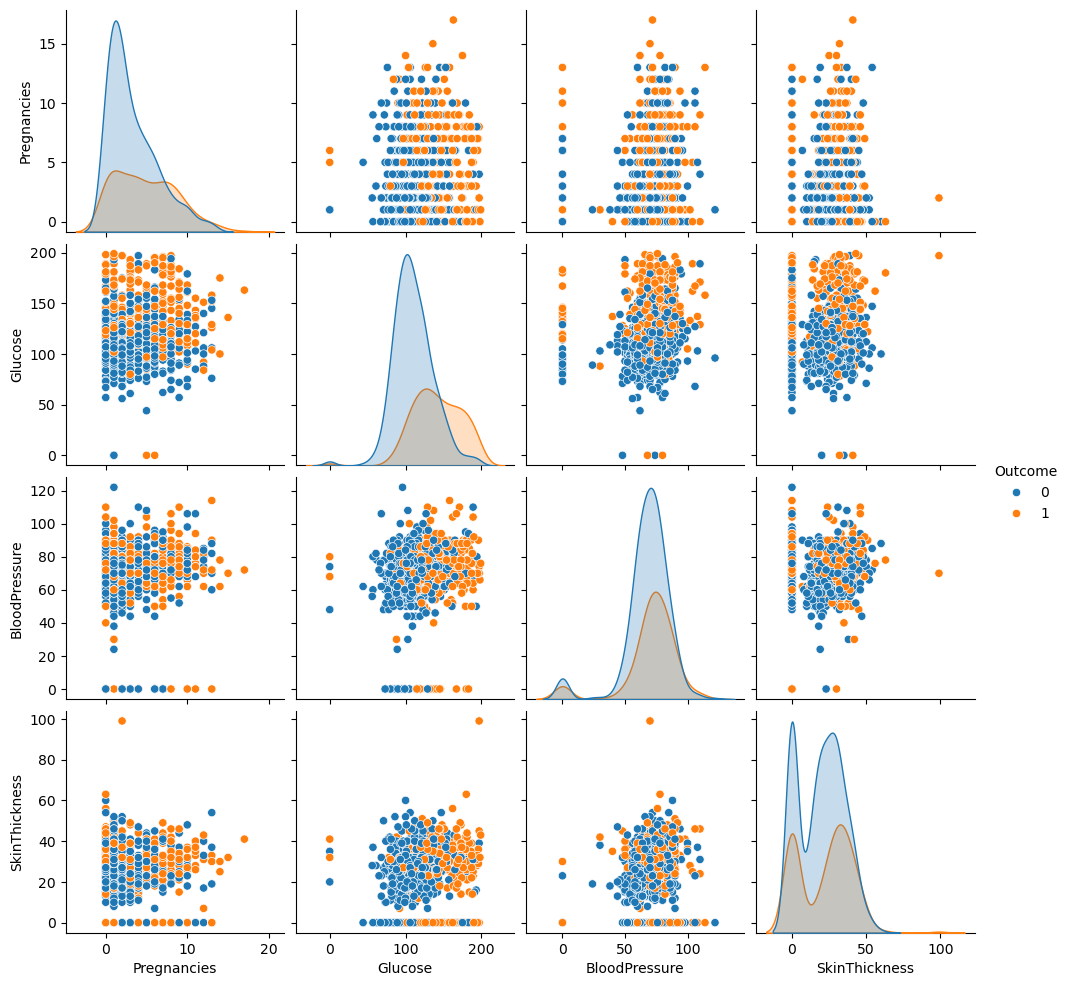

In [7]:
sns.pairplot(df,
             vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'],
            hue ='Outcome')
plt.show()

### Verifying the scope and outlier of a particular column


/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_58123/2320485741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pregnancies", data=df, palette="Set3")


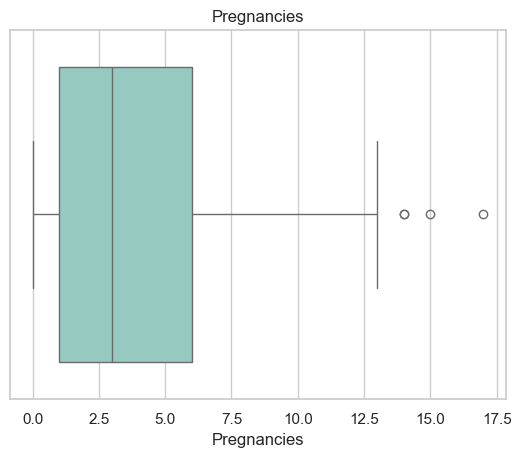

In [8]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Pregnancies", data=df, palette="Set3")
plt.title("Pregnancies")
plt.show()

### Check Histograms for Each Column

/var/folders/jy/y6254wqj0mb56d0c2yp5dtwc0000gn/T/ipykernel_58123/111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


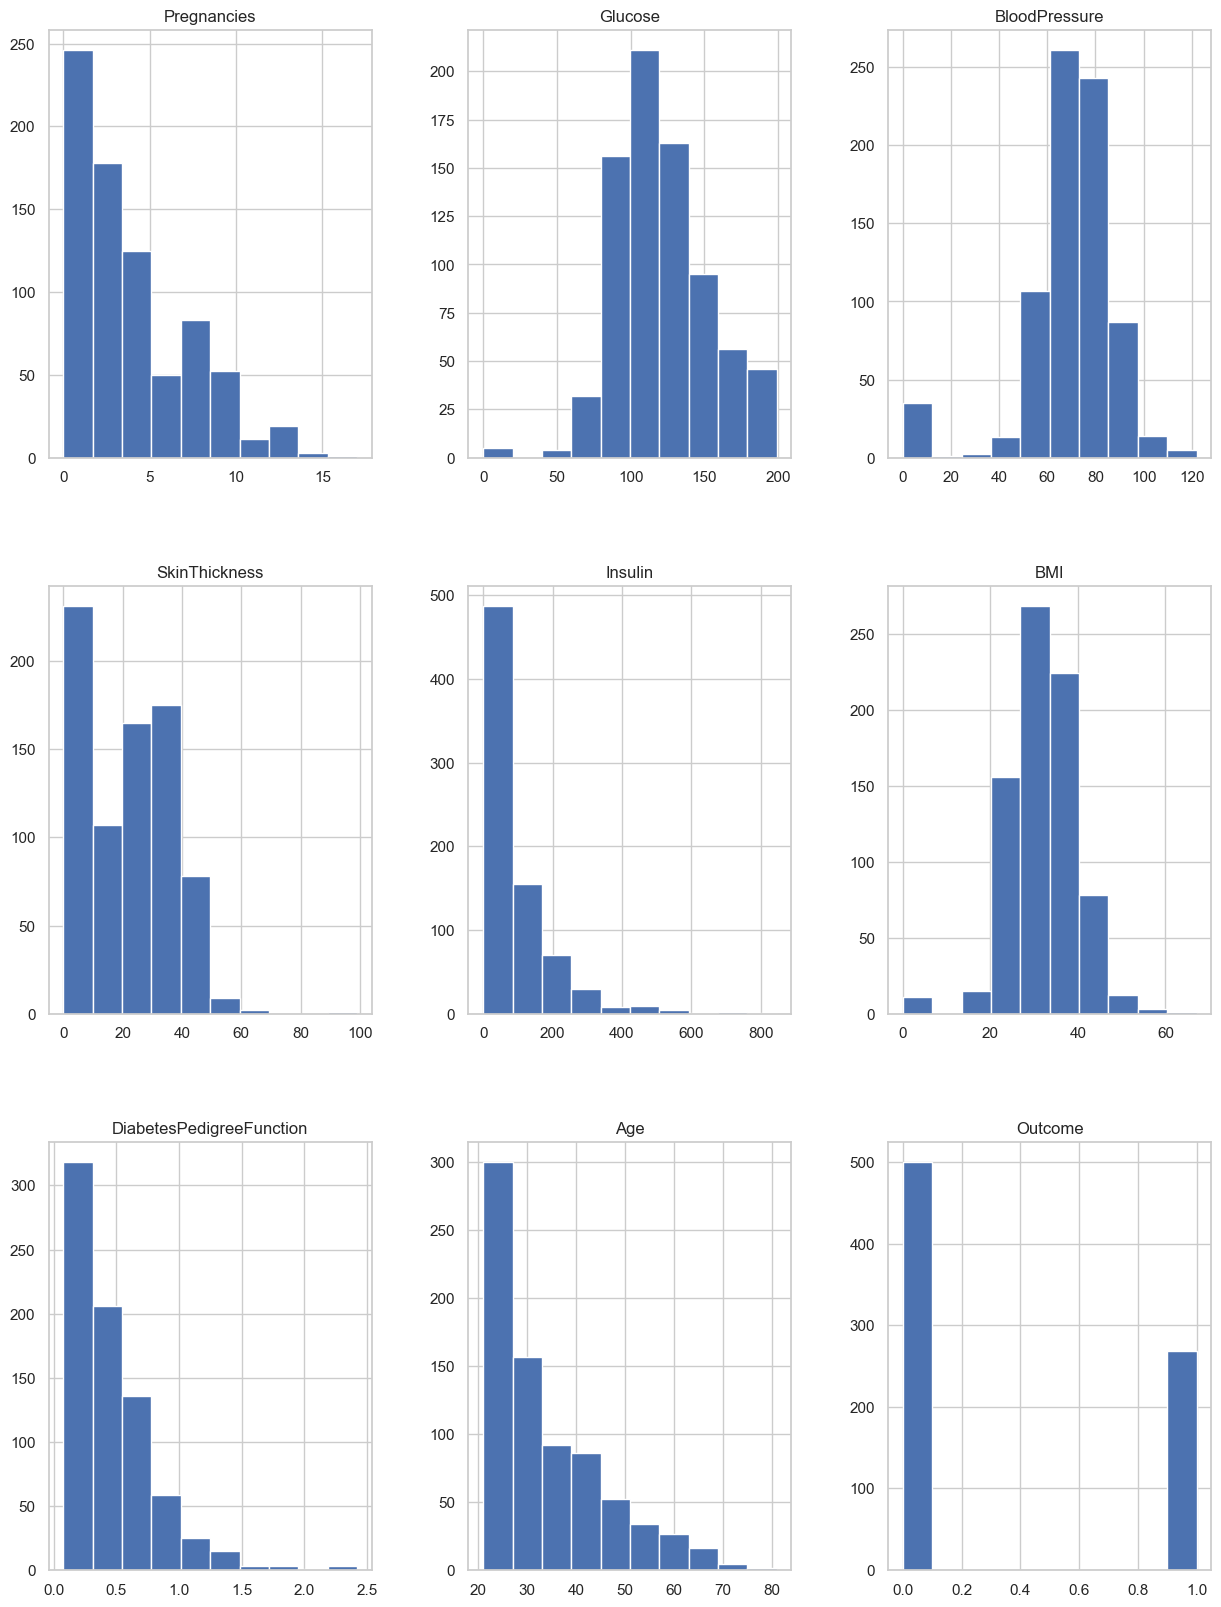

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [11]:
# 1열부터 8열까지가 입력 데이터 X
X = df.iloc[:, :8]

# 9열이 레이블 y
y = df.iloc[:, 8]

### One-Hot-Encoding

In [43]:
Y = pd.get_dummies(y).values

In [44]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [45]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [46]:
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

### Defining the Model

In [65]:
model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                90        
                                                                 
 dense_41 (Dense)            (None, 8)                 88        
                                                                 
 dense_42 (Dense)            (None, 6)                 54        
                                                                 
 dense_43 (Dense)            (None, 1)                 7         
                                                                 
Total params: 239 (956.00 Byte)
Trainable params: 239 (956.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 예측
y_pred = model.predict(X_test)

# y_pred를 0과 1로 변환
y_pred_class = (y_pred > 0.5).astype(int)

# y_test는 이미 0과 1로 되어 있으므로 np.argmax를 사용할 필요가 없습니다
y_test_class = y_test

# 평가 지표 출력
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))


Epoch 1/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.6736 - val_loss: 0.6161 - val_accuracy: 0.6458
Epoch 2/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.6753 - val_loss: 0.6190 - val_accuracy: 0.6562
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.6806 - val_loss: 0.6170 - val_accuracy: 0.6562
Epoch 4/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.6840 - val_loss: 0.6173 - val_accuracy: 0.6562
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6806 - val_loss: 0.6209 - val_accuracy: 0.6615
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.6823 - val_loss: 0.6172 - val_accuracy: 0.6615
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6788 - val_loss: 0.6172 - val_accuracy: 0.6667
Epoch 8/30
18/18 [==

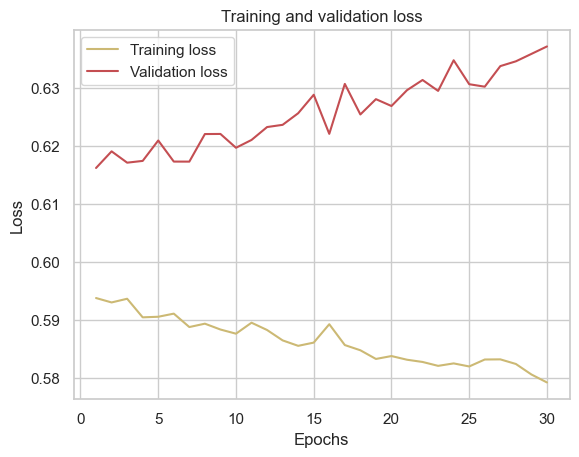

In [68]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

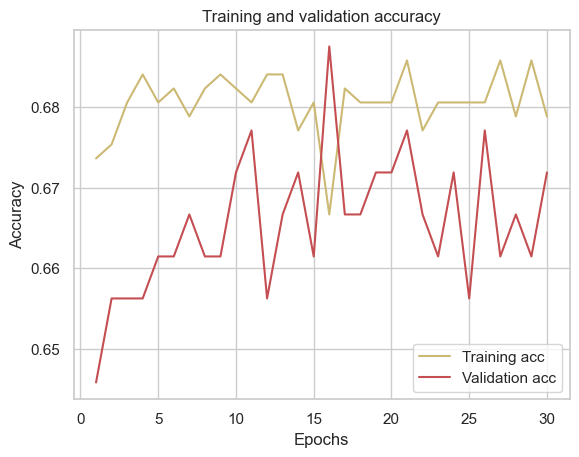

In [69]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       130
           1       0.48      0.26      0.34        62

    accuracy                           0.67       192
   macro avg       0.60      0.56      0.56       192
weighted avg       0.64      0.67      0.64       192

[[113  17]
 [ 46  16]]
